In [77]:
!pip install tensorflow-gpu

In [78]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3337040488429245465
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6300893184
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1060438440743199677
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [79]:
import tensorflow as tf

##### 데이터 로딩

In [109]:
from tensorflow.keras.datasets import mnist
# 손글씨 데이터

data = mnist.load_data()  # 데이터불러와서 변수에넣기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [110]:
X_train.shape, y_train.shape   # (데이터 개수, 가로,세로 픽셀 수)

((60000, 28, 28), (60000,))

In [111]:
X_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##### 데이터 시각화

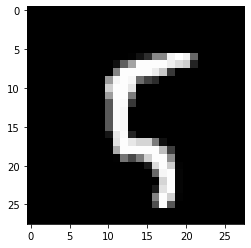

In [112]:
import matplotlib.pyplot as plt

plt.imshow(X_train[100], cmap='gray')

In [113]:
y_train[100]  #라벨링은 숫자5

5

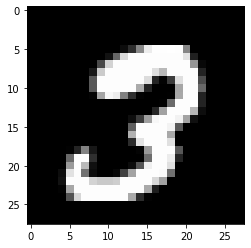

In [114]:
plt.imshow(X_train[12345], cmap='gray')

In [115]:
y_train[12345] 

3

In [116]:
import numpy as np

# 라벨 종류
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [117]:
# 라벨 빈도수
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [118]:
# 일부 데이터만 샘플링해서 사용
X_train = X_train[:1000, :]  # 60000개 중에 1000개 사용
y_train = y_train[:1000]
X_test = X_test[:300, :]
y_test = y_test[:300]

In [119]:
X_train.shape

(1000, 28, 28)

In [120]:
# 이미지를 CNN에 입력으로 주기 위해서는
#    - 데이터에 색상이 필요
#    - 0-255 범위의 픽셀값을 0.0-1.0범위로 정규화
# 흑백이미지이므로 색상차원은 1로 설정 (칼라라면 3으로 설정)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype("float32")/255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype("float32")/255

In [121]:
X_train.shape

(1000, 28, 28, 1)

###  모델링
1. 모델 구조 설계
2. 모델 학습/평가 결과 시각화
3. 모델 평가

In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [123]:
# to_categorical : 라벨값이 수치인 경우에만 원핫인코딩 가능
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [124]:
y_train_one_hot.shape

(1000, 10)

In [125]:
# 1. 모델 구조 설계
mnist_model = Sequential()

# CNN 층 추가 (특성추출)
# filters : 컨볼루션에 사용하는 필터의 개수, 출력수
# kerneal_size : 컨볼루션에 사용하는 필터의 크기 (3x3 , 5x5)
# input_shape : 입력이미지 데이터의 크기
mnist_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1),
                       activation='relu'))

# pool_size : 얼마나 이미지를 축소할 것인지 - (2,2) : 4배로 축소
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(InputLayer(input_shape=(28,28)))
mnist_model.add(Flatten()) # 들어온 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add(Dense(units=32, activation='relu'))
mnist_model.add(Dense(units=64, activation='relu'))
mnist_model.add(Dense(units=64, activation='relu'))
mnist_model.add(Dense(units=32, activation='relu'))
# 다중분류의 출력층의 units=클래스의 수
mnist_model.add(Dense(units=10, activation='softmax')) #출력층

mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 input_4 (InputLayer)        multiple                  0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_15 (Dense)            (None, 32)                173088    
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                      

In [126]:
# 2. 모델 학습/평가 방법 설정
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics='accuracy')

In [127]:
# 3. 모델 학습 및 학습결과 시각화

In [128]:
mnist_history = mnist_model.fit(X_train, y_train_one_hot, 
                                validation_data=(X_test, y_test_one_hot),
                                epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 2.0037 - accuracy: 0.2610 - val_loss: 1.5297 - val_accuracy: 0.4933
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9519 - accuracy: 0.6940 - val_loss: 0.7319 - val_accuracy: 0.7467
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.8430 - val_loss: 0.5491 - val_accuracy: 0.8333
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.8630 - val_loss: 0.4982 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 0.9010 - val_loss: 0.4558 - val_accuracy: 0.8667
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.9330 - val_loss: 0.4626 - val_accuracy: 0.8700
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2027 - accuracy: 0.9450 - val_loss: 0.4011 - val_accuracy: 0.8800
Epoch 8/100


Epoch 58/100
32/32 [==============================] - 0s 5ms/step - loss: 1.7326e-04 - accuracy: 1.0000 - val_loss: 0.5636 - val_accuracy: 0.9000
Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 1.6520e-04 - accuracy: 1.0000 - val_loss: 0.5627 - val_accuracy: 0.9000
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 1.5666e-04 - accuracy: 1.0000 - val_loss: 0.5667 - val_accuracy: 0.9000
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4826e-04 - accuracy: 1.0000 - val_loss: 0.5670 - val_accuracy: 0.9000
Epoch 62/100
32/32 [==============================] - 0s 6ms/step - loss: 1.4338e-04 - accuracy: 1.0000 - val_loss: 0.5675 - val_accuracy: 0.9000
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4043e-04 - accuracy: 1.0000 - val_loss: 0.5740 - val_accuracy: 0.9000
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3139e-04 - accuracy: 1.0000 - val_loss: 0.5733 -

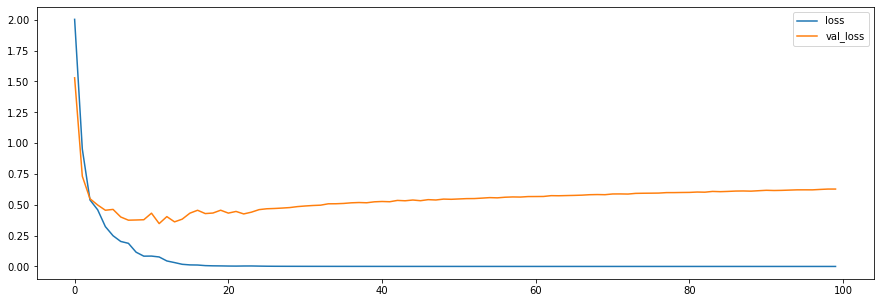

In [129]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['loss'], label='loss')
plt.plot(mnist_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

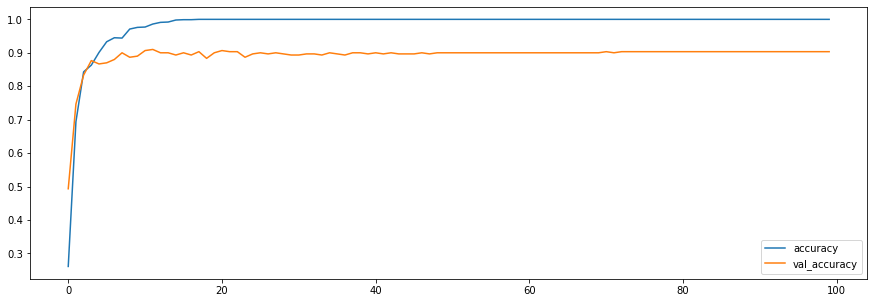

In [130]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['accuracy'], label='accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [131]:
# 4. 모델 평가
mnist_model.evaluate(X_test, y_test_one_hot)
# out:  loss, acc

10/10 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.9033


[0.6275766491889954, 0.903333306312561]

In [135]:
from tensorflow.keras.layers import Dropout

# 과적합 문제 발생 (훈련데이터 100%, 테스트데이터 90%)
# Dropout()을 사용
# Dropout층은 앞층과 뒷층의 파라미터의 수의 차이가 큰 곳에 배치
mnist_model1 = Sequential()

mnist_model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1),
                       activation='relu'))
mnist_model1.add(MaxPooling2D(pool_size=(2,2)))

mnist_model1.add(Flatten())

mnist_model1.add(Dense(units=32, activation='relu'))
mnist_model1.add(Dropout(0.5)) #50% 드랍아웃시킴
mnist_model1.add(Dense(units=64, activation='relu'))
mnist_model1.add(Dense(units=64, activation='relu'))
mnist_model1.add(Dense(units=32, activation='relu'))
mnist_model1.add(Dense(units=10, activation='softmax')) #출력층

mnist_model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_30 (Dense)            (None, 32)                173088    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                      

In [136]:
# 2. 모델 학습/평가 방법 설정
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics='accuracy')

In [ ]:
# 3. 모델 학습 및 학습결과 시각화

In [140]:
mnist_history = mnist_model.fit(X_train, y_train_one_hot, 
                                validation_data=(X_test, y_test_one_hot),
                                epochs=5000)

Epoch 1/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5034e-09 - accuracy: 1.0000 - val_loss: 1.0087 - val_accuracy: 0.8967
Epoch 2/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.2187e-09 - accuracy: 1.0000 - val_loss: 1.0131 - val_accuracy: 0.8967
Epoch 3/5000
32/32 [==============================] - 0s 6ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 1.0086 - val_accuracy: 0.8967
Epoch 4/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 1.0160 - val_accuracy: 0.8967
Epoch 5/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 1.0111 - val_accuracy: 0.8967
Epoch 6/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 1.0125 - val_accuracy: 0.8967
Epoch 7/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.4571e-09 - accuracy: 1.0000 - val_loss: 1.0105 -

Epoch 57/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 1.1635 - val_accuracy: 0.8900
Epoch 58/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 1.1658 - val_accuracy: 0.8900
Epoch 59/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 1.1835 - val_accuracy: 0.8900
Epoch 60/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 1.1881 - val_accuracy: 0.8933
Epoch 61/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 1.1848 - val_accuracy: 0.8867
Epoch 62/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.8610e-09 - accuracy: 1.0000 - val_loss: 1.2035 - val_accuracy: 0.8867
Epoch 63/5000
32/32 [==============================] - 0s 6ms/step - loss: 3.2187e-09 - accuracy: 1.0000 - val_loss: 1

32/32 [==============================] - 0s 5ms/step - loss: 3.4174e-04 - accuracy: 1.0000 - val_loss: 0.4250 - val_accuracy: 0.9267
Epoch 114/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.2578e-04 - accuracy: 1.0000 - val_loss: 0.4257 - val_accuracy: 0.9267
Epoch 115/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0915e-04 - accuracy: 1.0000 - val_loss: 0.4279 - val_accuracy: 0.9267
Epoch 116/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.9785e-04 - accuracy: 1.0000 - val_loss: 0.4304 - val_accuracy: 0.9267
Epoch 117/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.8458e-04 - accuracy: 1.0000 - val_loss: 0.4335 - val_accuracy: 0.9267
Epoch 118/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7162e-04 - accuracy: 1.0000 - val_loss: 0.4340 - val_accuracy: 0.9267
Epoch 119/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5880e-04 - accuracy: 1.0000 - val_loss: 0.4349 - 

32/32 [==============================] - 0s 5ms/step - loss: 5.3489e-05 - accuracy: 1.0000 - val_loss: 0.4969 - val_accuracy: 0.9333
Epoch 169/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.2040e-05 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 0.9300
Epoch 170/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.0683e-05 - accuracy: 1.0000 - val_loss: 0.4994 - val_accuracy: 0.9333
Epoch 171/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.9315e-05 - accuracy: 1.0000 - val_loss: 0.5012 - val_accuracy: 0.9333
Epoch 172/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.8148e-05 - accuracy: 1.0000 - val_loss: 0.5027 - val_accuracy: 0.9333
Epoch 173/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.6923e-05 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.9333
Epoch 174/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.5548e-05 - accuracy: 1.0000 - val_loss: 0.5046 - 

32/32 [==============================] - 0s 5ms/step - loss: 1.3989e-05 - accuracy: 1.0000 - val_loss: 0.5567 - val_accuracy: 0.9333
Epoch 224/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3684e-05 - accuracy: 1.0000 - val_loss: 0.5565 - val_accuracy: 0.9333
Epoch 225/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.3415e-05 - accuracy: 1.0000 - val_loss: 0.5580 - val_accuracy: 0.9333
Epoch 226/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3045e-05 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.9333
Epoch 227/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2777e-05 - accuracy: 1.0000 - val_loss: 0.5592 - val_accuracy: 0.9333
Epoch 228/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2497e-05 - accuracy: 1.0000 - val_loss: 0.5603 - val_accuracy: 0.9333
Epoch 229/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2227e-05 - accuracy: 1.0000 - val_loss: 0.5623 - 

32/32 [==============================] - 0s 6ms/step - loss: 4.3179e-06 - accuracy: 1.0000 - val_loss: 0.6024 - val_accuracy: 0.9333
Epoch 279/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.2307e-06 - accuracy: 1.0000 - val_loss: 0.6036 - val_accuracy: 0.9333
Epoch 280/5000
32/32 [==============================] - 0s 6ms/step - loss: 4.1571e-06 - accuracy: 1.0000 - val_loss: 0.6032 - val_accuracy: 0.9333
Epoch 281/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.0680e-06 - accuracy: 1.0000 - val_loss: 0.6053 - val_accuracy: 0.9333
Epoch 282/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9875e-06 - accuracy: 1.0000 - val_loss: 0.6051 - val_accuracy: 0.9333
Epoch 283/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9097e-06 - accuracy: 1.0000 - val_loss: 0.6068 - val_accuracy: 0.9333
Epoch 284/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8406e-06 - accuracy: 1.0000 - val_loss: 0.6072 - 

32/32 [==============================] - 0s 6ms/step - loss: 1.5074e-06 - accuracy: 1.0000 - val_loss: 0.6471 - val_accuracy: 0.9300
Epoch 334/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4777e-06 - accuracy: 1.0000 - val_loss: 0.6486 - val_accuracy: 0.9300
Epoch 335/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4578e-06 - accuracy: 1.0000 - val_loss: 0.6490 - val_accuracy: 0.9300
Epoch 336/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4231e-06 - accuracy: 1.0000 - val_loss: 0.6492 - val_accuracy: 0.9300
Epoch 337/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3947e-06 - accuracy: 1.0000 - val_loss: 0.6496 - val_accuracy: 0.9300
Epoch 338/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3693e-06 - accuracy: 1.0000 - val_loss: 0.6510 - val_accuracy: 0.9300
Epoch 339/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3413e-06 - accuracy: 1.0000 - val_loss: 0.6515 - 

32/32 [==============================] - 0s 5ms/step - loss: 5.2941e-07 - accuracy: 1.0000 - val_loss: 0.6922 - val_accuracy: 0.9300
Epoch 389/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.1999e-07 - accuracy: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.9300
Epoch 390/5000
32/32 [==============================] - 0s 6ms/step - loss: 5.1129e-07 - accuracy: 1.0000 - val_loss: 0.6934 - val_accuracy: 0.9300
Epoch 391/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.0032e-07 - accuracy: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.9300
Epoch 392/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.9054e-07 - accuracy: 1.0000 - val_loss: 0.6950 - val_accuracy: 0.9267
Epoch 393/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.8339e-07 - accuracy: 1.0000 - val_loss: 0.6954 - val_accuracy: 0.9300
Epoch 394/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.7409e-07 - accuracy: 1.0000 - val_loss: 0.6971 - 

32/32 [==============================] - 0s 5ms/step - loss: 1.9193e-07 - accuracy: 1.0000 - val_loss: 0.7358 - val_accuracy: 0.9267
Epoch 444/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9002e-07 - accuracy: 1.0000 - val_loss: 0.7375 - val_accuracy: 0.9267
Epoch 445/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8632e-07 - accuracy: 1.0000 - val_loss: 0.7387 - val_accuracy: 0.9267
Epoch 446/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8394e-07 - accuracy: 1.0000 - val_loss: 0.7396 - val_accuracy: 0.9267
Epoch 447/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7929e-07 - accuracy: 1.0000 - val_loss: 0.7395 - val_accuracy: 0.9267
Epoch 448/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7738e-07 - accuracy: 1.0000 - val_loss: 0.7421 - val_accuracy: 0.9267
Epoch 449/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7369e-07 - accuracy: 1.0000 - val_loss: 0.7423 - 

32/32 [==============================] - 0s 5ms/step - loss: 7.2241e-08 - accuracy: 1.0000 - val_loss: 0.7799 - val_accuracy: 0.9267
Epoch 499/5000
32/32 [==============================] - 0s 6ms/step - loss: 7.2241e-08 - accuracy: 1.0000 - val_loss: 0.7808 - val_accuracy: 0.9267
Epoch 500/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.9857e-08 - accuracy: 1.0000 - val_loss: 0.7818 - val_accuracy: 0.9300
Epoch 501/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.8903e-08 - accuracy: 1.0000 - val_loss: 0.7825 - val_accuracy: 0.9267
Epoch 502/5000
32/32 [==============================] - 0s 6ms/step - loss: 6.7711e-08 - accuracy: 1.0000 - val_loss: 0.7839 - val_accuracy: 0.9267
Epoch 503/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.7115e-08 - accuracy: 1.0000 - val_loss: 0.7836 - val_accuracy: 0.9300
Epoch 504/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.5923e-08 - accuracy: 1.0000 - val_loss: 0.7843 - 

32/32 [==============================] - 0s 5ms/step - loss: 2.7180e-08 - accuracy: 1.0000 - val_loss: 0.8151 - val_accuracy: 0.9300
Epoch 554/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6584e-08 - accuracy: 1.0000 - val_loss: 0.8141 - val_accuracy: 0.9300
Epoch 555/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6345e-08 - accuracy: 1.0000 - val_loss: 0.8148 - val_accuracy: 0.9300
Epoch 556/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5749e-08 - accuracy: 1.0000 - val_loss: 0.8165 - val_accuracy: 0.9300
Epoch 557/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5511e-08 - accuracy: 1.0000 - val_loss: 0.8163 - val_accuracy: 0.9300
Epoch 558/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5034e-08 - accuracy: 1.0000 - val_loss: 0.8175 - val_accuracy: 0.9300
Epoch 559/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.4438e-08 - accuracy: 1.0000 - val_loss: 0.8172 - 

32/32 [==============================] - 0s 5ms/step - loss: 9.4175e-09 - accuracy: 1.0000 - val_loss: 0.8472 - val_accuracy: 0.9300
Epoch 609/5000
32/32 [==============================] - 0s 5ms/step - loss: 9.2983e-09 - accuracy: 1.0000 - val_loss: 0.8477 - val_accuracy: 0.9300
Epoch 610/5000
32/32 [==============================] - 0s 5ms/step - loss: 9.0599e-09 - accuracy: 1.0000 - val_loss: 0.8460 - val_accuracy: 0.9300
Epoch 611/5000
32/32 [==============================] - 0s 5ms/step - loss: 9.5367e-09 - accuracy: 1.0000 - val_loss: 0.8471 - val_accuracy: 0.9300
Epoch 612/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.8215e-09 - accuracy: 1.0000 - val_loss: 0.8481 - val_accuracy: 0.9300
Epoch 613/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.2254e-09 - accuracy: 1.0000 - val_loss: 0.8488 - val_accuracy: 0.9300
Epoch 614/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-09 - accuracy: 1.0000 - val_loss: 0.8486 - 

32/32 [==============================] - 0s 6ms/step - loss: 2.9802e-09 - accuracy: 1.0000 - val_loss: 0.8721 - val_accuracy: 0.9300
Epoch 664/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 0.8735 - val_accuracy: 0.9300
Epoch 665/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 0.8735 - val_accuracy: 0.9300
Epoch 666/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6226e-09 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.9300
Epoch 667/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2650e-09 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.9300
Epoch 668/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2650e-09 - accuracy: 1.0000 - val_loss: 0.8750 - val_accuracy: 0.9300
Epoch 669/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.6226e-09 - accuracy: 1.0000 - val_loss: 0.8752 - 

32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 0.8873 - val_accuracy: 0.9333
Epoch 719/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 0.8874 - val_accuracy: 0.9333
Epoch 720/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8882 - val_accuracy: 0.9333
Epoch 721/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.8886 - val_accuracy: 0.9333
Epoch 722/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8901 - val_accuracy: 0.9333
Epoch 723/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8903 - val_accuracy: 0.9367
Epoch 724/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 0.8869 - 

32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 1.0385 - val_accuracy: 0.9300
Epoch 774/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 1.0470 - val_accuracy: 0.9300
Epoch 775/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2650e-09 - accuracy: 1.0000 - val_loss: 1.0499 - val_accuracy: 0.9300
Epoch 776/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5497e-09 - accuracy: 1.0000 - val_loss: 1.0526 - val_accuracy: 0.9300
Epoch 777/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.0561 - val_accuracy: 0.9300
Epoch 778/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.0627 - val_accuracy: 0.9300
Epoch 779/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.0701 - 

32/32 [==============================] - 0s 5ms/step - loss: 2.8130e-04 - accuracy: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.9467
Epoch 829/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6165e-04 - accuracy: 1.0000 - val_loss: 0.3615 - val_accuracy: 0.9467
Epoch 830/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.4355e-04 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.9467
Epoch 831/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2814e-04 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9467
Epoch 832/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1426e-04 - accuracy: 1.0000 - val_loss: 0.3641 - val_accuracy: 0.9400
Epoch 833/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9924e-04 - accuracy: 1.0000 - val_loss: 0.3646 - val_accuracy: 0.9400
Epoch 834/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8509e-04 - accuracy: 1.0000 - val_loss: 0.3664 - 

32/32 [==============================] - 0s 5ms/step - loss: 2.5253e-05 - accuracy: 1.0000 - val_loss: 0.4060 - val_accuracy: 0.9467
Epoch 884/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.4544e-05 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.9467
Epoch 885/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3906e-05 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.9500
Epoch 886/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3230e-05 - accuracy: 1.0000 - val_loss: 0.4086 - val_accuracy: 0.9500
Epoch 887/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.2569e-05 - accuracy: 1.0000 - val_loss: 0.4092 - val_accuracy: 0.9500
Epoch 888/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1963e-05 - accuracy: 1.0000 - val_loss: 0.4098 - val_accuracy: 0.9500
Epoch 889/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1407e-05 - accuracy: 1.0000 - val_loss: 0.4102 - 

32/32 [==============================] - 0s 5ms/step - loss: 6.4163e-06 - accuracy: 1.0000 - val_loss: 0.4521 - val_accuracy: 0.9433
Epoch 939/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.2909e-06 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9433
Epoch 940/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.1377e-06 - accuracy: 1.0000 - val_loss: 0.4543 - val_accuracy: 0.9400
Epoch 941/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.0120e-06 - accuracy: 1.0000 - val_loss: 0.4544 - val_accuracy: 0.9433
Epoch 942/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.8678e-06 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.9400
Epoch 943/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.7702e-06 - accuracy: 1.0000 - val_loss: 0.4565 - val_accuracy: 0.9400
Epoch 944/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.6315e-06 - accuracy: 1.0000 - val_loss: 0.4568 - 

32/32 [==============================] - 0s 5ms/step - loss: 2.1578e-06 - accuracy: 1.0000 - val_loss: 0.4903 - val_accuracy: 0.9400
Epoch 994/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1145e-06 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.9400
Epoch 995/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0823e-06 - accuracy: 1.0000 - val_loss: 0.4916 - val_accuracy: 0.9400
Epoch 996/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0425e-06 - accuracy: 1.0000 - val_loss: 0.4924 - val_accuracy: 0.9400
Epoch 997/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9979e-06 - accuracy: 1.0000 - val_loss: 0.4930 - val_accuracy: 0.9400
Epoch 998/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.9579e-06 - accuracy: 1.0000 - val_loss: 0.4936 - val_accuracy: 0.9400
Epoch 999/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9234e-06 - accuracy: 1.0000 - val_loss: 0.4936 - 

32/32 [==============================] - 0s 6ms/step - loss: 7.8189e-07 - accuracy: 1.0000 - val_loss: 0.5236 - val_accuracy: 0.9400
Epoch 1049/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.6782e-07 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.9400
Epoch 1050/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.5578e-07 - accuracy: 1.0000 - val_loss: 0.5241 - val_accuracy: 0.9400
Epoch 1051/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.4017e-07 - accuracy: 1.0000 - val_loss: 0.5243 - val_accuracy: 0.9400
Epoch 1052/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.2741e-07 - accuracy: 1.0000 - val_loss: 0.5248 - val_accuracy: 0.9400
Epoch 1053/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.1430e-07 - accuracy: 1.0000 - val_loss: 0.5261 - val_accuracy: 0.9400
Epoch 1054/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.0095e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 2.8598e-07 - accuracy: 1.0000 - val_loss: 0.5520 - val_accuracy: 0.9400
Epoch 1104/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.8133e-07 - accuracy: 1.0000 - val_loss: 0.5533 - val_accuracy: 0.9400
Epoch 1105/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7525e-07 - accuracy: 1.0000 - val_loss: 0.5532 - val_accuracy: 0.9400
Epoch 1106/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7084e-07 - accuracy: 1.0000 - val_loss: 0.5534 - val_accuracy: 0.9400
Epoch 1107/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6679e-07 - accuracy: 1.0000 - val_loss: 0.5538 - val_accuracy: 0.9400
Epoch 1108/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6166e-07 - accuracy: 1.0000 - val_loss: 0.5545 - val_accuracy: 0.9400
Epoch 1109/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5821e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 1.0991e-07 - accuracy: 1.0000 - val_loss: 0.5828 - val_accuracy: 0.9400
Epoch 1159/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0812e-07 - accuracy: 1.0000 - val_loss: 0.5842 - val_accuracy: 0.9400
Epoch 1160/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0622e-07 - accuracy: 1.0000 - val_loss: 0.5821 - val_accuracy: 0.9400
Epoch 1161/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0431e-07 - accuracy: 1.0000 - val_loss: 0.5836 - val_accuracy: 0.9400
Epoch 1162/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0264e-07 - accuracy: 1.0000 - val_loss: 0.5843 - val_accuracy: 0.9400
Epoch 1163/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0097e-07 - accuracy: 1.0000 - val_loss: 0.5857 - val_accuracy: 0.9400
Epoch 1164/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0014e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 4.3988e-08 - accuracy: 1.0000 - val_loss: 0.6105 - val_accuracy: 0.9400
Epoch 1214/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.2558e-08 - accuracy: 1.0000 - val_loss: 0.6111 - val_accuracy: 0.9400
Epoch 1215/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.1962e-08 - accuracy: 1.0000 - val_loss: 0.6123 - val_accuracy: 0.9400
Epoch 1216/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.1008e-08 - accuracy: 1.0000 - val_loss: 0.6117 - val_accuracy: 0.9400
Epoch 1217/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9935e-08 - accuracy: 1.0000 - val_loss: 0.6130 - val_accuracy: 0.9400
Epoch 1218/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9697e-08 - accuracy: 1.0000 - val_loss: 0.6126 - val_accuracy: 0.9400
Epoch 1219/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8981e-08 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 1.5616e-08 - accuracy: 1.0000 - val_loss: 0.6286 - val_accuracy: 0.9400
Epoch 1269/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5259e-08 - accuracy: 1.0000 - val_loss: 0.6288 - val_accuracy: 0.9400
Epoch 1270/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4901e-08 - accuracy: 1.0000 - val_loss: 0.6294 - val_accuracy: 0.9400
Epoch 1271/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4663e-08 - accuracy: 1.0000 - val_loss: 0.6294 - val_accuracy: 0.9400
Epoch 1272/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4305e-08 - accuracy: 1.0000 - val_loss: 0.6304 - val_accuracy: 0.9400
Epoch 1273/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3947e-08 - accuracy: 1.0000 - val_loss: 0.6316 - val_accuracy: 0.9367
Epoch 1274/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4305e-08 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 5.3644e-09 - accuracy: 1.0000 - val_loss: 0.6567 - val_accuracy: 0.9400
Epoch 1324/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.2452e-09 - accuracy: 1.0000 - val_loss: 0.6572 - val_accuracy: 0.9400
Epoch 1325/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.2452e-09 - accuracy: 1.0000 - val_loss: 0.6566 - val_accuracy: 0.9367
Epoch 1326/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.6492e-09 - accuracy: 1.0000 - val_loss: 0.6565 - val_accuracy: 0.9367
Epoch 1327/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.7684e-09 - accuracy: 1.0000 - val_loss: 0.6577 - val_accuracy: 0.9400
Epoch 1328/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.0068e-09 - accuracy: 1.0000 - val_loss: 0.6594 - val_accuracy: 0.9400
Epoch 1329/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.5300e-09 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 0.7109 - val_accuracy: 0.9367
Epoch 1379/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5034e-09 - accuracy: 1.0000 - val_loss: 0.7148 - val_accuracy: 0.9367
Epoch 1380/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7143 - val_accuracy: 0.9367
Epoch 1381/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 0.7169 - val_accuracy: 0.9367
Epoch 1382/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5034e-09 - accuracy: 1.0000 - val_loss: 0.7163 - val_accuracy: 0.9367
Epoch 1383/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.7194 - val_accuracy: 0.9367
Epoch 1384/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2650e-09 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 0.8272 - val_accuracy: 0.9400
Epoch 1434/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.8307 - val_accuracy: 0.9400
Epoch 1435/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8310 - val_accuracy: 0.9400
Epoch 1436/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 0.8407 - val_accuracy: 0.9400
Epoch 1437/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8486 - val_accuracy: 0.9400
Epoch 1438/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 0.8463 - val_accuracy: 0.9400
Epoch 1439/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 3.0467e-04 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 0.9067
Epoch 1489/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7911e-04 - accuracy: 1.0000 - val_loss: 0.6772 - val_accuracy: 0.9033
Epoch 1490/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5405e-04 - accuracy: 1.0000 - val_loss: 0.6781 - val_accuracy: 0.9033
Epoch 1491/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.3517e-04 - accuracy: 1.0000 - val_loss: 0.6792 - val_accuracy: 0.9033
Epoch 1492/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1819e-04 - accuracy: 1.0000 - val_loss: 0.6803 - val_accuracy: 0.9000
Epoch 1493/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0345e-04 - accuracy: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.9000
Epoch 1494/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8993e-04 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 2.5717e-05 - accuracy: 1.0000 - val_loss: 0.7175 - val_accuracy: 0.9033
Epoch 1544/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.4915e-05 - accuracy: 1.0000 - val_loss: 0.7174 - val_accuracy: 0.9033
Epoch 1545/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.4202e-05 - accuracy: 1.0000 - val_loss: 0.7182 - val_accuracy: 0.9033
Epoch 1546/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3431e-05 - accuracy: 1.0000 - val_loss: 0.7193 - val_accuracy: 0.9033
Epoch 1547/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2703e-05 - accuracy: 1.0000 - val_loss: 0.7218 - val_accuracy: 0.9033
Epoch 1548/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2056e-05 - accuracy: 1.0000 - val_loss: 0.7222 - val_accuracy: 0.9033
Epoch 1549/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1396e-05 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 4.7826e-06 - accuracy: 1.0000 - val_loss: 0.7920 - val_accuracy: 0.9067
Epoch 1599/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.6307e-06 - accuracy: 1.0000 - val_loss: 0.7958 - val_accuracy: 0.9067
Epoch 1600/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.4680e-06 - accuracy: 1.0000 - val_loss: 0.7972 - val_accuracy: 0.9067
Epoch 1601/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.3364e-06 - accuracy: 1.0000 - val_loss: 0.7994 - val_accuracy: 0.9067
Epoch 1602/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.1932e-06 - accuracy: 1.0000 - val_loss: 0.8031 - val_accuracy: 0.9067
Epoch 1603/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.1013e-06 - accuracy: 1.0000 - val_loss: 0.8036 - val_accuracy: 0.9067
Epoch 1604/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9646e-06 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 1.1942e-06 - accuracy: 1.0000 - val_loss: 0.8726 - val_accuracy: 0.9100
Epoch 1654/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1663e-06 - accuracy: 1.0000 - val_loss: 0.8740 - val_accuracy: 0.9100
Epoch 1655/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1410e-06 - accuracy: 1.0000 - val_loss: 0.8758 - val_accuracy: 0.9100
Epoch 1656/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1146e-06 - accuracy: 1.0000 - val_loss: 0.8772 - val_accuracy: 0.9100
Epoch 1657/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0922e-06 - accuracy: 1.0000 - val_loss: 0.8769 - val_accuracy: 0.9100
Epoch 1658/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0669e-06 - accuracy: 1.0000 - val_loss: 0.8774 - val_accuracy: 0.9100
Epoch 1659/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0480e-06 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 3.9899e-07 - accuracy: 1.0000 - val_loss: 0.9065 - val_accuracy: 0.9167
Epoch 1709/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9208e-07 - accuracy: 1.0000 - val_loss: 0.9077 - val_accuracy: 0.9167
Epoch 1710/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8445e-07 - accuracy: 1.0000 - val_loss: 0.9081 - val_accuracy: 0.9133
Epoch 1711/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.7801e-07 - accuracy: 1.0000 - val_loss: 0.9088 - val_accuracy: 0.9133
Epoch 1712/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.7229e-07 - accuracy: 1.0000 - val_loss: 0.9081 - val_accuracy: 0.9100
Epoch 1713/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.6621e-07 - accuracy: 1.0000 - val_loss: 0.9106 - val_accuracy: 0.9133
Epoch 1714/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.6180e-07 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 1.5998e-07 - accuracy: 1.0000 - val_loss: 0.9420 - val_accuracy: 0.9133
Epoch 1764/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.5819e-07 - accuracy: 1.0000 - val_loss: 0.9410 - val_accuracy: 0.9133
Epoch 1765/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5485e-07 - accuracy: 1.0000 - val_loss: 0.9417 - val_accuracy: 0.9133
Epoch 1766/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5306e-07 - accuracy: 1.0000 - val_loss: 0.9441 - val_accuracy: 0.9133
Epoch 1767/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.5092e-07 - accuracy: 1.0000 - val_loss: 0.9439 - val_accuracy: 0.9133
Epoch 1768/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.4782e-07 - accuracy: 1.0000 - val_loss: 0.9463 - val_accuracy: 0.9133
Epoch 1769/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.4543e-07 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 6.7472e-08 - accuracy: 1.0000 - val_loss: 0.9793 - val_accuracy: 0.9133
Epoch 1819/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.6519e-08 - accuracy: 1.0000 - val_loss: 0.9807 - val_accuracy: 0.9133
Epoch 1820/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.5923e-08 - accuracy: 1.0000 - val_loss: 0.9807 - val_accuracy: 0.9133
Epoch 1821/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.4254e-08 - accuracy: 1.0000 - val_loss: 0.9818 - val_accuracy: 0.9133
Epoch 1822/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.3658e-08 - accuracy: 1.0000 - val_loss: 0.9820 - val_accuracy: 0.9133
Epoch 1823/5000
32/32 [==============================] - 0s 6ms/step - loss: 6.2227e-08 - accuracy: 1.0000 - val_loss: 0.9818 - val_accuracy: 0.9133
Epoch 1824/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.1274e-08 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-08 - accuracy: 1.0000 - val_loss: 1.0086 - val_accuracy: 0.9167
Epoch 1874/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6941e-08 - accuracy: 1.0000 - val_loss: 1.0100 - val_accuracy: 0.9167
Epoch 1875/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.6703e-08 - accuracy: 1.0000 - val_loss: 1.0106 - val_accuracy: 0.9167
Epoch 1876/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.6107e-08 - accuracy: 1.0000 - val_loss: 1.0106 - val_accuracy: 0.9167
Epoch 1877/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5749e-08 - accuracy: 1.0000 - val_loss: 1.0115 - val_accuracy: 0.9167
Epoch 1878/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5630e-08 - accuracy: 1.0000 - val_loss: 1.0120 - val_accuracy: 0.9167
Epoch 1879/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.5630e-08 - accuracy: 1.0000 - val_loss: 1.0

32/32 [==============================] - 0s 6ms/step - loss: 1.1325e-08 - accuracy: 1.0000 - val_loss: 1.0464 - val_accuracy: 0.9267
Epoch 1929/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0729e-08 - accuracy: 1.0000 - val_loss: 1.0475 - val_accuracy: 0.9267
Epoch 1930/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0490e-08 - accuracy: 1.0000 - val_loss: 1.0483 - val_accuracy: 0.9267
Epoch 1931/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0014e-08 - accuracy: 1.0000 - val_loss: 1.0500 - val_accuracy: 0.9267
Epoch 1932/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0014e-08 - accuracy: 1.0000 - val_loss: 1.0498 - val_accuracy: 0.9267
Epoch 1933/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0490e-08 - accuracy: 1.0000 - val_loss: 1.0503 - val_accuracy: 0.9267
Epoch 1934/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0133e-08 - accuracy: 1.0000 - val_loss: 1.0

32/32 [==============================] - 0s 5ms/step - loss: 3.3379e-09 - accuracy: 1.0000 - val_loss: 1.1004 - val_accuracy: 0.9267
Epoch 1984/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 1.1023 - val_accuracy: 0.9233
Epoch 1985/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 1.1030 - val_accuracy: 0.9267
Epoch 1986/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.4571e-09 - accuracy: 1.0000 - val_loss: 1.1040 - val_accuracy: 0.9267
Epoch 1987/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.3379e-09 - accuracy: 1.0000 - val_loss: 1.1049 - val_accuracy: 0.9267
Epoch 1988/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 1.1065 - val_accuracy: 0.9267
Epoch 1989/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 1.1

32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.1404 - val_accuracy: 0.9267
Epoch 2039/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5497e-09 - accuracy: 1.0000 - val_loss: 1.1432 - val_accuracy: 0.9267
Epoch 2040/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.4305e-09 - accuracy: 1.0000 - val_loss: 1.1439 - val_accuracy: 0.9267
Epoch 2041/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.1459 - val_accuracy: 0.9300
Epoch 2042/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.5497e-09 - accuracy: 1.0000 - val_loss: 1.1462 - val_accuracy: 0.9300
Epoch 2043/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0729e-09 - accuracy: 1.0000 - val_loss: 1.1466 - val_accuracy: 0.9267
Epoch 2044/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1921e-09 - accuracy: 1.0000 - val_loss: 1.1

32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-10 - accuracy: 1.0000 - val_loss: 1.1981 - val_accuracy: 0.9233
Epoch 2094/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-10 - accuracy: 1.0000 - val_loss: 1.1993 - val_accuracy: 0.9233
Epoch 2095/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0729e-09 - accuracy: 1.0000 - val_loss: 1.2031 - val_accuracy: 0.9233
Epoch 2096/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-10 - accuracy: 1.0000 - val_loss: 1.2059 - val_accuracy: 0.9233
Epoch 2097/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3842e-10 - accuracy: 1.0000 - val_loss: 1.2062 - val_accuracy: 0.9233
Epoch 2098/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-10 - accuracy: 1.0000 - val_loss: 1.2038 - val_accuracy: 0.9233
Epoch 2099/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1921e-09 - accuracy: 1.0000 - val_loss: 1.2

32/32 [==============================] - 0s 5ms/step - loss: 3.5763e-10 - accuracy: 1.0000 - val_loss: 1.2919 - val_accuracy: 0.9233
Epoch 2149/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3842e-10 - accuracy: 1.0000 - val_loss: 1.2991 - val_accuracy: 0.9267
Epoch 2150/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 1.3022 - val_accuracy: 0.9267
Epoch 2151/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.3842e-10 - accuracy: 1.0000 - val_loss: 1.3036 - val_accuracy: 0.9267
Epoch 2152/5000
32/32 [==============================] - 0s 6ms/step - loss: 4.7684e-10 - accuracy: 1.0000 - val_loss: 1.3085 - val_accuracy: 0.9267
Epoch 2153/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.5763e-10 - accuracy: 1.0000 - val_loss: 1.3153 - val_accuracy: 0.9300
Epoch 2154/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 1.3

32/32 [==============================] - 0s 6ms/step - loss: 6.5577e-05 - accuracy: 1.0000 - val_loss: 0.4008 - val_accuracy: 0.9367
Epoch 2204/5000
32/32 [==============================] - 0s 6ms/step - loss: 6.2130e-05 - accuracy: 1.0000 - val_loss: 0.4008 - val_accuracy: 0.9367
Epoch 2205/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9157e-05 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.9367
Epoch 2206/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.5225e-05 - accuracy: 1.0000 - val_loss: 0.4006 - val_accuracy: 0.9400
Epoch 2207/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.2347e-05 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.9400
Epoch 2208/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.9303e-05 - accuracy: 1.0000 - val_loss: 0.4008 - val_accuracy: 0.9400
Epoch 2209/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.6786e-05 - accuracy: 1.0000 - val_loss: 0.4

32/32 [==============================] - 0s 6ms/step - loss: 4.6136e-06 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.9367
Epoch 2259/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.4104e-06 - accuracy: 1.0000 - val_loss: 0.4180 - val_accuracy: 0.9367
Epoch 2260/5000
32/32 [==============================] - 0s 6ms/step - loss: 4.2282e-06 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.9367
Epoch 2261/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.0641e-06 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.9367
Epoch 2262/5000
32/32 [==============================] - 0s 6ms/step - loss: 3.8941e-06 - accuracy: 1.0000 - val_loss: 0.4196 - val_accuracy: 0.9367
Epoch 2263/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.7443e-06 - accuracy: 1.0000 - val_loss: 0.4203 - val_accuracy: 0.9367
Epoch 2264/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.6023e-06 - accuracy: 1.0000 - val_loss: 0.4

32/32 [==============================] - 0s 5ms/step - loss: 4.4036e-07 - accuracy: 1.0000 - val_loss: 0.4595 - val_accuracy: 0.9433
Epoch 2314/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.2796e-07 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9433
Epoch 2315/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.1461e-07 - accuracy: 1.0000 - val_loss: 0.4611 - val_accuracy: 0.9433
Epoch 2316/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.0316e-07 - accuracy: 1.0000 - val_loss: 0.4619 - val_accuracy: 0.9433
Epoch 2317/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9184e-07 - accuracy: 1.0000 - val_loss: 0.4629 - val_accuracy: 0.9433
Epoch 2318/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8039e-07 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9433
Epoch 2319/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.6907e-07 - accuracy: 1.0000 - val_loss: 0.4

32/32 [==============================] - 0s 5ms/step - loss: 1.1575e-07 - accuracy: 1.0000 - val_loss: 0.5009 - val_accuracy: 0.9400
Epoch 2369/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1349e-07 - accuracy: 1.0000 - val_loss: 0.5016 - val_accuracy: 0.9400
Epoch 2370/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1122e-07 - accuracy: 1.0000 - val_loss: 0.5026 - val_accuracy: 0.9400
Epoch 2371/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0943e-07 - accuracy: 1.0000 - val_loss: 0.5033 - val_accuracy: 0.9400
Epoch 2372/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0800e-07 - accuracy: 1.0000 - val_loss: 0.5039 - val_accuracy: 0.9400
Epoch 2373/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0586e-07 - accuracy: 1.0000 - val_loss: 0.5047 - val_accuracy: 0.9400
Epoch 2374/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0431e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 4.6253e-08 - accuracy: 1.0000 - val_loss: 0.5368 - val_accuracy: 0.9433
Epoch 2424/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.6015e-08 - accuracy: 1.0000 - val_loss: 0.5374 - val_accuracy: 0.9433
Epoch 2425/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.5180e-08 - accuracy: 1.0000 - val_loss: 0.5385 - val_accuracy: 0.9433
Epoch 2426/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.4346e-08 - accuracy: 1.0000 - val_loss: 0.5391 - val_accuracy: 0.9433
Epoch 2427/5000
32/32 [==============================] - 0s 6ms/step - loss: 4.3392e-08 - accuracy: 1.0000 - val_loss: 0.5399 - val_accuracy: 0.9433
Epoch 2428/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.2677e-08 - accuracy: 1.0000 - val_loss: 0.5405 - val_accuracy: 0.9433
Epoch 2429/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 6ms/step - loss: 1.9789e-08 - accuracy: 1.0000 - val_loss: 0.5799 - val_accuracy: 0.9500
Epoch 2479/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9431e-08 - accuracy: 1.0000 - val_loss: 0.5808 - val_accuracy: 0.9500
Epoch 2480/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9431e-08 - accuracy: 1.0000 - val_loss: 0.5819 - val_accuracy: 0.9500
Epoch 2481/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8835e-08 - accuracy: 1.0000 - val_loss: 0.5826 - val_accuracy: 0.9500
Epoch 2482/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8835e-08 - accuracy: 1.0000 - val_loss: 0.5838 - val_accuracy: 0.9500
Epoch 2483/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8597e-08 - accuracy: 1.0000 - val_loss: 0.5845 - val_accuracy: 0.9500
Epoch 2484/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8239e-08 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 7.2718e-09 - accuracy: 1.0000 - val_loss: 0.6451 - val_accuracy: 0.9500
Epoch 2534/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.2718e-09 - accuracy: 1.0000 - val_loss: 0.6467 - val_accuracy: 0.9500
Epoch 2535/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.0333e-09 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.9500
Epoch 2536/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.0333e-09 - accuracy: 1.0000 - val_loss: 0.6493 - val_accuracy: 0.9500
Epoch 2537/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.0333e-09 - accuracy: 1.0000 - val_loss: 0.6508 - val_accuracy: 0.9467
Epoch 2538/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.7949e-09 - accuracy: 1.0000 - val_loss: 0.6523 - val_accuracy: 0.9467
Epoch 2539/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.6757e-09 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 2.9802e-09 - accuracy: 1.0000 - val_loss: 0.7330 - val_accuracy: 0.9433
Epoch 2589/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 0.7356 - val_accuracy: 0.9433
Epoch 2590/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 0.7382 - val_accuracy: 0.9433
Epoch 2591/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0994e-09 - accuracy: 1.0000 - val_loss: 0.7400 - val_accuracy: 0.9433
Epoch 2592/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.9802e-09 - accuracy: 1.0000 - val_loss: 0.7419 - val_accuracy: 0.9433
Epoch 2593/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 0.7443 - val_accuracy: 0.9433
Epoch 2594/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7418e-09 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 0.8467 - val_accuracy: 0.9367
Epoch 2644/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 0.8500 - val_accuracy: 0.9367
Epoch 2645/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 0.8513 - val_accuracy: 0.9367
Epoch 2646/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 0.8532 - val_accuracy: 0.9367
Epoch 2647/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 0.8561 - val_accuracy: 0.9367
Epoch 2648/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.1458e-09 - accuracy: 1.0000 - val_loss: 0.8580 - val_accuracy: 0.9367
Epoch 2649/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.5497e-09 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 0.9924 - val_accuracy: 0.9267
Epoch 2699/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4305e-09 - accuracy: 1.0000 - val_loss: 0.9937 - val_accuracy: 0.9267
Epoch 2700/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.9982 - val_accuracy: 0.9267
Epoch 2701/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.0018 - val_accuracy: 0.9267
Epoch 2702/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6689e-09 - accuracy: 1.0000 - val_loss: 1.0042 - val_accuracy: 0.9267
Epoch 2703/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3113e-09 - accuracy: 1.0000 - val_loss: 1.0090 - val_accuracy: 0.9267
Epoch 2704/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2650e-09 - accuracy: 1.0000 - val_loss: 1.0

32/32 [==============================] - 0s 5ms/step - loss: 1.1921e-09 - accuracy: 1.0000 - val_loss: 1.2253 - val_accuracy: 0.9267
Epoch 2754/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.3113e-09 - accuracy: 1.0000 - val_loss: 1.2316 - val_accuracy: 0.9267
Epoch 2755/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.4305e-09 - accuracy: 1.0000 - val_loss: 1.2423 - val_accuracy: 0.9267
Epoch 2756/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3113e-09 - accuracy: 1.0000 - val_loss: 1.2471 - val_accuracy: 0.9267
Epoch 2757/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 1.2526 - val_accuracy: 0.9267
Epoch 2758/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.9073e-09 - accuracy: 1.0000 - val_loss: 1.2583 - val_accuracy: 0.9267
Epoch 2759/5000
32/32 [==============================] - 0s 6ms/step - loss: 2.0266e-09 - accuracy: 1.0000 - val_loss: 1.2

32/32 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.5700 - val_accuracy: 0.9267
Epoch 2809/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9990 - val_loss: 0.4650 - val_accuracy: 0.9300
Epoch 2810/5000
32/32 [==============================] - 0s 5ms/step - loss: 6.8946e-04 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9400
Epoch 2811/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.2748e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.9400
Epoch 2812/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.8668e-04 - accuracy: 1.0000 - val_loss: 0.4456 - val_accuracy: 0.9400
Epoch 2813/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.6267e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.9433
Epoch 2814/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3918e-04 - accuracy: 1.0000 - val_loss: 0.4463 - va

32/32 [==============================] - 0s 5ms/step - loss: 1.3802e-05 - accuracy: 1.0000 - val_loss: 0.4733 - val_accuracy: 0.9433
Epoch 2864/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3422e-05 - accuracy: 1.0000 - val_loss: 0.4738 - val_accuracy: 0.9433
Epoch 2865/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3057e-05 - accuracy: 1.0000 - val_loss: 0.4742 - val_accuracy: 0.9433
Epoch 2866/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2717e-05 - accuracy: 1.0000 - val_loss: 0.4747 - val_accuracy: 0.9433
Epoch 2867/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2378e-05 - accuracy: 1.0000 - val_loss: 0.4753 - val_accuracy: 0.9433
Epoch 2868/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2027e-05 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 0.9433
Epoch 2869/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.1701e-05 - accuracy: 1.0000 - val_loss: 0.4

32/32 [==============================] - 0s 5ms/step - loss: 4.0064e-06 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.9433
Epoch 2919/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.9282e-06 - accuracy: 1.0000 - val_loss: 0.5010 - val_accuracy: 0.9433
Epoch 2920/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8513e-06 - accuracy: 1.0000 - val_loss: 0.5015 - val_accuracy: 0.9433
Epoch 2921/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.7793e-06 - accuracy: 1.0000 - val_loss: 0.5019 - val_accuracy: 0.9433
Epoch 2922/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.7057e-06 - accuracy: 1.0000 - val_loss: 0.5024 - val_accuracy: 0.9433
Epoch 2923/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.6259e-06 - accuracy: 1.0000 - val_loss: 0.5029 - val_accuracy: 0.9433
Epoch 2924/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.5530e-06 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 1.3903e-06 - accuracy: 1.0000 - val_loss: 0.5251 - val_accuracy: 0.9433
Epoch 2974/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3665e-06 - accuracy: 1.0000 - val_loss: 0.5255 - val_accuracy: 0.9433
Epoch 2975/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3424e-06 - accuracy: 1.0000 - val_loss: 0.5259 - val_accuracy: 0.9433
Epoch 2976/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.3177e-06 - accuracy: 1.0000 - val_loss: 0.5264 - val_accuracy: 0.9433
Epoch 2977/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2948e-06 - accuracy: 1.0000 - val_loss: 0.5269 - val_accuracy: 0.9433
Epoch 2978/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2723e-06 - accuracy: 1.0000 - val_loss: 0.5274 - val_accuracy: 0.9433
Epoch 2979/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.2501e-06 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 5.3489e-07 - accuracy: 1.0000 - val_loss: 0.5488 - val_accuracy: 0.9433
Epoch 3029/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.2511e-07 - accuracy: 1.0000 - val_loss: 0.5492 - val_accuracy: 0.9433
Epoch 3030/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.1713e-07 - accuracy: 1.0000 - val_loss: 0.5496 - val_accuracy: 0.9433
Epoch 3031/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.0723e-07 - accuracy: 1.0000 - val_loss: 0.5501 - val_accuracy: 0.9433
Epoch 3032/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.9948e-07 - accuracy: 1.0000 - val_loss: 0.5505 - val_accuracy: 0.9433
Epoch 3033/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.9066e-07 - accuracy: 1.0000 - val_loss: 0.5508 - val_accuracy: 0.9433
Epoch 3034/5000
32/32 [==============================] - 0s 5ms/step - loss: 4.8327e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 2.1028e-07 - accuracy: 1.0000 - val_loss: 0.5710 - val_accuracy: 0.9467
Epoch 3084/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0719e-07 - accuracy: 1.0000 - val_loss: 0.5714 - val_accuracy: 0.9467
Epoch 3085/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0456e-07 - accuracy: 1.0000 - val_loss: 0.5719 - val_accuracy: 0.9467
Epoch 3086/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.0027e-07 - accuracy: 1.0000 - val_loss: 0.5722 - val_accuracy: 0.9467
Epoch 3087/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9705e-07 - accuracy: 1.0000 - val_loss: 0.5727 - val_accuracy: 0.9467
Epoch 3088/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9431e-07 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.9467
Epoch 3089/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.9133e-07 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 8.2612e-08 - accuracy: 1.0000 - val_loss: 0.5943 - val_accuracy: 0.9467
Epoch 3139/5000
32/32 [==============================] - 0s 5ms/step - loss: 8.0228e-08 - accuracy: 1.0000 - val_loss: 0.5948 - val_accuracy: 0.9467
Epoch 3140/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.8797e-08 - accuracy: 1.0000 - val_loss: 0.5952 - val_accuracy: 0.9467
Epoch 3141/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.7605e-08 - accuracy: 1.0000 - val_loss: 0.5955 - val_accuracy: 0.9467
Epoch 3142/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.6055e-08 - accuracy: 1.0000 - val_loss: 0.5959 - val_accuracy: 0.9467
Epoch 3143/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.4506e-08 - accuracy: 1.0000 - val_loss: 0.5963 - val_accuracy: 0.9467
Epoch 3144/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.3194e-08 - accuracy: 1.0000 - val_loss: 0.5

32/32 [==============================] - 0s 5ms/step - loss: 3.1233e-08 - accuracy: 1.0000 - val_loss: 0.6162 - val_accuracy: 0.9467
Epoch 3194/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0637e-08 - accuracy: 1.0000 - val_loss: 0.6166 - val_accuracy: 0.9467
Epoch 3195/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.0041e-08 - accuracy: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.9467
Epoch 3196/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.9325e-08 - accuracy: 1.0000 - val_loss: 0.6175 - val_accuracy: 0.9467
Epoch 3197/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.8849e-08 - accuracy: 1.0000 - val_loss: 0.6179 - val_accuracy: 0.9467
Epoch 3198/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.8491e-08 - accuracy: 1.0000 - val_loss: 0.6182 - val_accuracy: 0.9467
Epoch 3199/5000
32/32 [==============================] - 0s 5ms/step - loss: 2.7895e-08 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 1.0848e-08 - accuracy: 1.0000 - val_loss: 0.6378 - val_accuracy: 0.9467
Epoch 3249/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0729e-08 - accuracy: 1.0000 - val_loss: 0.6383 - val_accuracy: 0.9467
Epoch 3250/5000
32/32 [==============================] - 0s 6ms/step - loss: 1.0610e-08 - accuracy: 1.0000 - val_loss: 0.6386 - val_accuracy: 0.9467
Epoch 3251/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0371e-08 - accuracy: 1.0000 - val_loss: 0.6390 - val_accuracy: 0.9467
Epoch 3252/5000
32/32 [==============================] - 0s 5ms/step - loss: 1.0014e-08 - accuracy: 1.0000 - val_loss: 0.6393 - val_accuracy: 0.9467
Epoch 3253/5000
32/32 [==============================] - 0s 5ms/step - loss: 9.5367e-09 - accuracy: 1.0000 - val_loss: 0.6397 - val_accuracy: 0.9467
Epoch 3254/5000
32/32 [==============================] - 0s 5ms/step - loss: 9.4175e-09 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 3.8147e-09 - accuracy: 1.0000 - val_loss: 0.6593 - val_accuracy: 0.9467
Epoch 3304/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8147e-09 - accuracy: 1.0000 - val_loss: 0.6597 - val_accuracy: 0.9467
Epoch 3305/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.8147e-09 - accuracy: 1.0000 - val_loss: 0.6599 - val_accuracy: 0.9467
Epoch 3306/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.6606 - val_accuracy: 0.9467
Epoch 3307/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.6609 - val_accuracy: 0.9467
Epoch 3308/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.6613 - val_accuracy: 0.9467
Epoch 3309/5000
32/32 [==============================] - 0s 5ms/step - loss: 3.4571e-09 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 8.3446e-10 - accuracy: 1.0000 - val_loss: 0.6788 - val_accuracy: 0.9467
Epoch 3359/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.1526e-10 - accuracy: 1.0000 - val_loss: 0.6792 - val_accuracy: 0.9467
Epoch 3360/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.1526e-10 - accuracy: 1.0000 - val_loss: 0.6795 - val_accuracy: 0.9467
Epoch 3361/5000
32/32 [==============================] - 0s 5ms/step - loss: 7.1526e-10 - accuracy: 1.0000 - val_loss: 0.6797 - val_accuracy: 0.9467
Epoch 3362/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.6802 - val_accuracy: 0.9467
Epoch 3363/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.6804 - val_accuracy: 0.9467
Epoch 3364/5000
32/32 [==============================] - 0s 5ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.6

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.6998 - val_accuracy: 0.9467
Epoch 3414/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7002 - val_accuracy: 0.9467
Epoch 3415/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7007 - val_accuracy: 0.9467
Epoch 3416/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7011 - val_accuracy: 0.9467
Epoch 3417/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7015 - val_accuracy: 0.9467
Epoch 3418/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7019 - val_accuracy: 0.9467
Epoch 3419/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7215 - val_accuracy: 0.9467
Epoch 3469/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7219 - val_accuracy: 0.9467
Epoch 3470/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7223 - val_accuracy: 0.9467
Epoch 3471/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7227 - val_accuracy: 0.9467
Epoch 3472/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7230 - val_accuracy: 0.9467
Epoch 3473/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 0.9467
Epoch 3474/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7426 - val_accuracy: 0.9467
Epoch 3524/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7429 - val_accuracy: 0.9467
Epoch 3525/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7433 - val_accuracy: 0.9467
Epoch 3526/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7437 - val_accuracy: 0.9467
Epoch 3527/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7441 - val_accuracy: 0.9467
Epoch 3528/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7445 - val_accuracy: 0.9467
Epoch 3529/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7646 - val_accuracy: 0.9500
Epoch 3579/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7651 - val_accuracy: 0.9500
Epoch 3580/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7655 - val_accuracy: 0.9500
Epoch 3581/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7659 - val_accuracy: 0.9500
Epoch 3582/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7663 - val_accuracy: 0.9500
Epoch 3583/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7667 - val_accuracy: 0.9500
Epoch 3584/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7866 - val_accuracy: 0.9500
Epoch 3634/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7871 - val_accuracy: 0.9500
Epoch 3635/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7874 - val_accuracy: 0.9500
Epoch 3636/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7877 - val_accuracy: 0.9500
Epoch 3637/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7882 - val_accuracy: 0.9500
Epoch 3638/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7886 - val_accuracy: 0.9500
Epoch 3639/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8066 - val_accuracy: 0.9500
Epoch 3689/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8070 - val_accuracy: 0.9500
Epoch 3690/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8073 - val_accuracy: 0.9500
Epoch 3691/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8077 - val_accuracy: 0.9500
Epoch 3692/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8081 - val_accuracy: 0.9500
Epoch 3693/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8084 - val_accuracy: 0.9500
Epoch 3694/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8229 - val_accuracy: 0.9500
Epoch 3744/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8232 - val_accuracy: 0.9500
Epoch 3745/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8235 - val_accuracy: 0.9500
Epoch 3746/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8238 - val_accuracy: 0.9500
Epoch 3747/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8241 - val_accuracy: 0.9500
Epoch 3748/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8244 - val_accuracy: 0.9500
Epoch 3749/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8377 - val_accuracy: 0.9500
Epoch 3799/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8380 - val_accuracy: 0.9500
Epoch 3800/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8382 - val_accuracy: 0.9500
Epoch 3801/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8384 - val_accuracy: 0.9500
Epoch 3802/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8386 - val_accuracy: 0.9500
Epoch 3803/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8389 - val_accuracy: 0.9500
Epoch 3804/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8500 - val_accuracy: 0.9500
Epoch 3854/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8502 - val_accuracy: 0.9500
Epoch 3855/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8505 - val_accuracy: 0.9500
Epoch 3856/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8508 - val_accuracy: 0.9500
Epoch 3857/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8510 - val_accuracy: 0.9500
Epoch 3858/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8512 - val_accuracy: 0.9500
Epoch 3859/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8607 - val_accuracy: 0.9500
Epoch 3909/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8609 - val_accuracy: 0.9500
Epoch 3910/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8610 - val_accuracy: 0.9500
Epoch 3911/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8612 - val_accuracy: 0.9500
Epoch 3912/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8614 - val_accuracy: 0.9500
Epoch 3913/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8615 - val_accuracy: 0.9500
Epoch 3914/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8691 - val_accuracy: 0.9500
Epoch 3964/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8693 - val_accuracy: 0.9500
Epoch 3965/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8694 - val_accuracy: 0.9500
Epoch 3966/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8696 - val_accuracy: 0.9500
Epoch 3967/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8697 - val_accuracy: 0.9500
Epoch 3968/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8698 - val_accuracy: 0.9500
Epoch 3969/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8762 - val_accuracy: 0.9500
Epoch 4019/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8763 - val_accuracy: 0.9500
Epoch 4020/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8764 - val_accuracy: 0.9500
Epoch 4021/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8766 - val_accuracy: 0.9500
Epoch 4022/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8767 - val_accuracy: 0.9500
Epoch 4023/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8768 - val_accuracy: 0.9500
Epoch 4024/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8823 - val_accuracy: 0.9500
Epoch 4074/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8824 - val_accuracy: 0.9500
Epoch 4075/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8825 - val_accuracy: 0.9500
Epoch 4076/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8826 - val_accuracy: 0.9500
Epoch 4077/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8827 - val_accuracy: 0.9500
Epoch 4078/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8829 - val_accuracy: 0.9500
Epoch 4079/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8877 - val_accuracy: 0.9500
Epoch 4129/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8878 - val_accuracy: 0.9500
Epoch 4130/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8879 - val_accuracy: 0.9500
Epoch 4131/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8880 - val_accuracy: 0.9500
Epoch 4132/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8881 - val_accuracy: 0.9500
Epoch 4133/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8882 - val_accuracy: 0.9500
Epoch 4134/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8928 - val_accuracy: 0.9500
Epoch 4184/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8929 - val_accuracy: 0.9500
Epoch 4185/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8930 - val_accuracy: 0.9500
Epoch 4186/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8931 - val_accuracy: 0.9500
Epoch 4187/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8931 - val_accuracy: 0.9500
Epoch 4188/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8932 - val_accuracy: 0.9500
Epoch 4189/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8976 - val_accuracy: 0.9500
Epoch 4239/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8976 - val_accuracy: 0.9500
Epoch 4240/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8977 - val_accuracy: 0.9500
Epoch 4241/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8978 - val_accuracy: 0.9500
Epoch 4242/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8979 - val_accuracy: 0.9500
Epoch 4243/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8979 - val_accuracy: 0.9500
Epoch 4244/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.8

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9020 - val_accuracy: 0.9500
Epoch 4294/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9021 - val_accuracy: 0.9500
Epoch 4295/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9022 - val_accuracy: 0.9500
Epoch 4296/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9023 - val_accuracy: 0.9500
Epoch 4297/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9024 - val_accuracy: 0.9500
Epoch 4298/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9025 - val_accuracy: 0.9500
Epoch 4299/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9065 - val_accuracy: 0.9500
Epoch 4349/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9066 - val_accuracy: 0.9500
Epoch 4350/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9066 - val_accuracy: 0.9500
Epoch 4351/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9067 - val_accuracy: 0.9500
Epoch 4352/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9068 - val_accuracy: 0.9500
Epoch 4353/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9069 - val_accuracy: 0.9500
Epoch 4354/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9108 - val_accuracy: 0.9500
Epoch 4404/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9109 - val_accuracy: 0.9500
Epoch 4405/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9110 - val_accuracy: 0.9500
Epoch 4406/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9111 - val_accuracy: 0.9500
Epoch 4407/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9111 - val_accuracy: 0.9500
Epoch 4408/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9113 - val_accuracy: 0.9500
Epoch 4409/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9153 - val_accuracy: 0.9500
Epoch 4459/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9153 - val_accuracy: 0.9500
Epoch 4460/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9154 - val_accuracy: 0.9500
Epoch 4461/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9155 - val_accuracy: 0.9500
Epoch 4462/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9156 - val_accuracy: 0.9500
Epoch 4463/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9156 - val_accuracy: 0.9500
Epoch 4464/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9194 - val_accuracy: 0.9500
Epoch 4514/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9195 - val_accuracy: 0.9500
Epoch 4515/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9195 - val_accuracy: 0.9500
Epoch 4516/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9196 - val_accuracy: 0.9500
Epoch 4517/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9197 - val_accuracy: 0.9500
Epoch 4518/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9197 - val_accuracy: 0.9500
Epoch 4519/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9233 - val_accuracy: 0.9500
Epoch 4569/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9234 - val_accuracy: 0.9500
Epoch 4570/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9235 - val_accuracy: 0.9500
Epoch 4571/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9235 - val_accuracy: 0.9500
Epoch 4572/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9236 - val_accuracy: 0.9500
Epoch 4573/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9237 - val_accuracy: 0.9500
Epoch 4574/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9271 - val_accuracy: 0.9500
Epoch 4624/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9271 - val_accuracy: 0.9500
Epoch 4625/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9272 - val_accuracy: 0.9500
Epoch 4626/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9272 - val_accuracy: 0.9500
Epoch 4627/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9273 - val_accuracy: 0.9500
Epoch 4628/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9274 - val_accuracy: 0.9500
Epoch 4629/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9308 - val_accuracy: 0.9500
Epoch 4679/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9308 - val_accuracy: 0.9500
Epoch 4680/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9309 - val_accuracy: 0.9500
Epoch 4681/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9310 - val_accuracy: 0.9500
Epoch 4682/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9310 - val_accuracy: 0.9500
Epoch 4683/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9311 - val_accuracy: 0.9500
Epoch 4684/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9351 - val_accuracy: 0.9500
Epoch 4734/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9352 - val_accuracy: 0.9500
Epoch 4735/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9353 - val_accuracy: 0.9500
Epoch 4736/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9354 - val_accuracy: 0.9500
Epoch 4737/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9355 - val_accuracy: 0.9500
Epoch 4738/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9356 - val_accuracy: 0.9500
Epoch 4739/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9401 - val_accuracy: 0.9500
Epoch 4789/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9402 - val_accuracy: 0.9500
Epoch 4790/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9403 - val_accuracy: 0.9500
Epoch 4791/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9404 - val_accuracy: 0.9500
Epoch 4792/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9404 - val_accuracy: 0.9500
Epoch 4793/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9405 - val_accuracy: 0.9500
Epoch 4794/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9448 - val_accuracy: 0.9500
Epoch 4844/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9449 - val_accuracy: 0.9500
Epoch 4845/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9450 - val_accuracy: 0.9500
Epoch 4846/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9451 - val_accuracy: 0.9500
Epoch 4847/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9452 - val_accuracy: 0.9500
Epoch 4848/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9453 - val_accuracy: 0.9500
Epoch 4849/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9493 - val_accuracy: 0.9500
Epoch 4899/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9494 - val_accuracy: 0.9500
Epoch 4900/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9495 - val_accuracy: 0.9500
Epoch 4901/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9496 - val_accuracy: 0.9500
Epoch 4902/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9497 - val_accuracy: 0.9500
Epoch 4903/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9498 - val_accuracy: 0.9500
Epoch 4904/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9536 - val_accuracy: 0.9500
Epoch 4954/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9537 - val_accuracy: 0.9500
Epoch 4955/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9537 - val_accuracy: 0.9500
Epoch 4956/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9538 - val_accuracy: 0.9500
Epoch 4957/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.9500
Epoch 4958/5000
32/32 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.9500
Epoch 4959/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9

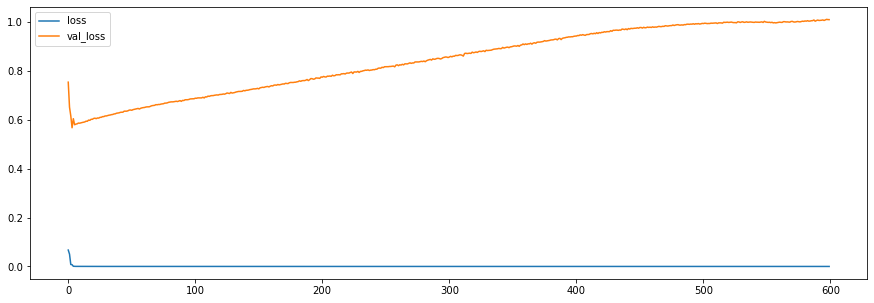

In [138]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['loss'], label='loss')
plt.plot(mnist_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

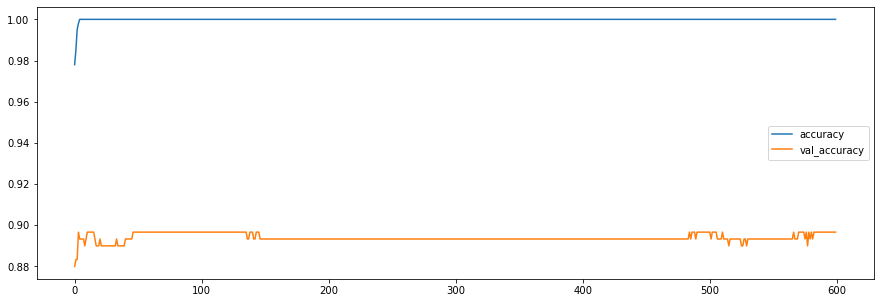

In [139]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['accuracy'], label='accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()